In [2]:
import matplotlib.pyplot as plt
from kraken.spot.client import Market
import pandas as pd

___
# Load historical XBT/USD 4h ohlc data for the past month

In [3]:
df = pd.DataFrame(
    Market().get_ohlc(pair='XBTUSD', interval=240, since=1667149226)['XXBTZUSD'], # 4h candles since October 30th 2022 until November 30. 2022
    columns=['time', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'count']
).astype(float)
df['time'] = pd.to_datetime(df['time'], unit='s')
df = df.set_index('time')
df = df.sort_values(by='time')
df

,open,high,low,close,vwap,volume,count
time,,,,,,,
2022-10-30 20:00:00,20657.3,20755.4,20525.0,20625.0,20645.4,260.220488,2107.0
2022-10-31 00:00:00,20625.0,20663.0,20444.5,20526.7,20551.6,360.798752,2161.0
2022-10-31 04:00:00,20526.7,20591.6,20465.0,20548.5,20521.4,217.822355,1533.0
2022-10-31 08:00:00,20548.8,20823.0,20467.9,20734.9,20704.1,480.201315,2935.0
2022-10-31 12:00:00,20734.1,20744.7,20250.1,20397.0,20512.5,1194.447276,4694.0
...,...,...,...,...,...,...,...
2022-11-30 00:00:00,16428.8,17083.2,16420.2,16845.1,16816.8,1310.687297,8353.0
2022-11-30 04:00:00,16845.8,16917.6,16820.5,16883.6,16871.7,256.366609,3073.0
2022-11-30 08:00:00,16882.7,16924.9,16845.1,16881.6,16882.3,195.279083,2307.0


Text(0, 0.5, 'price in Dollar')

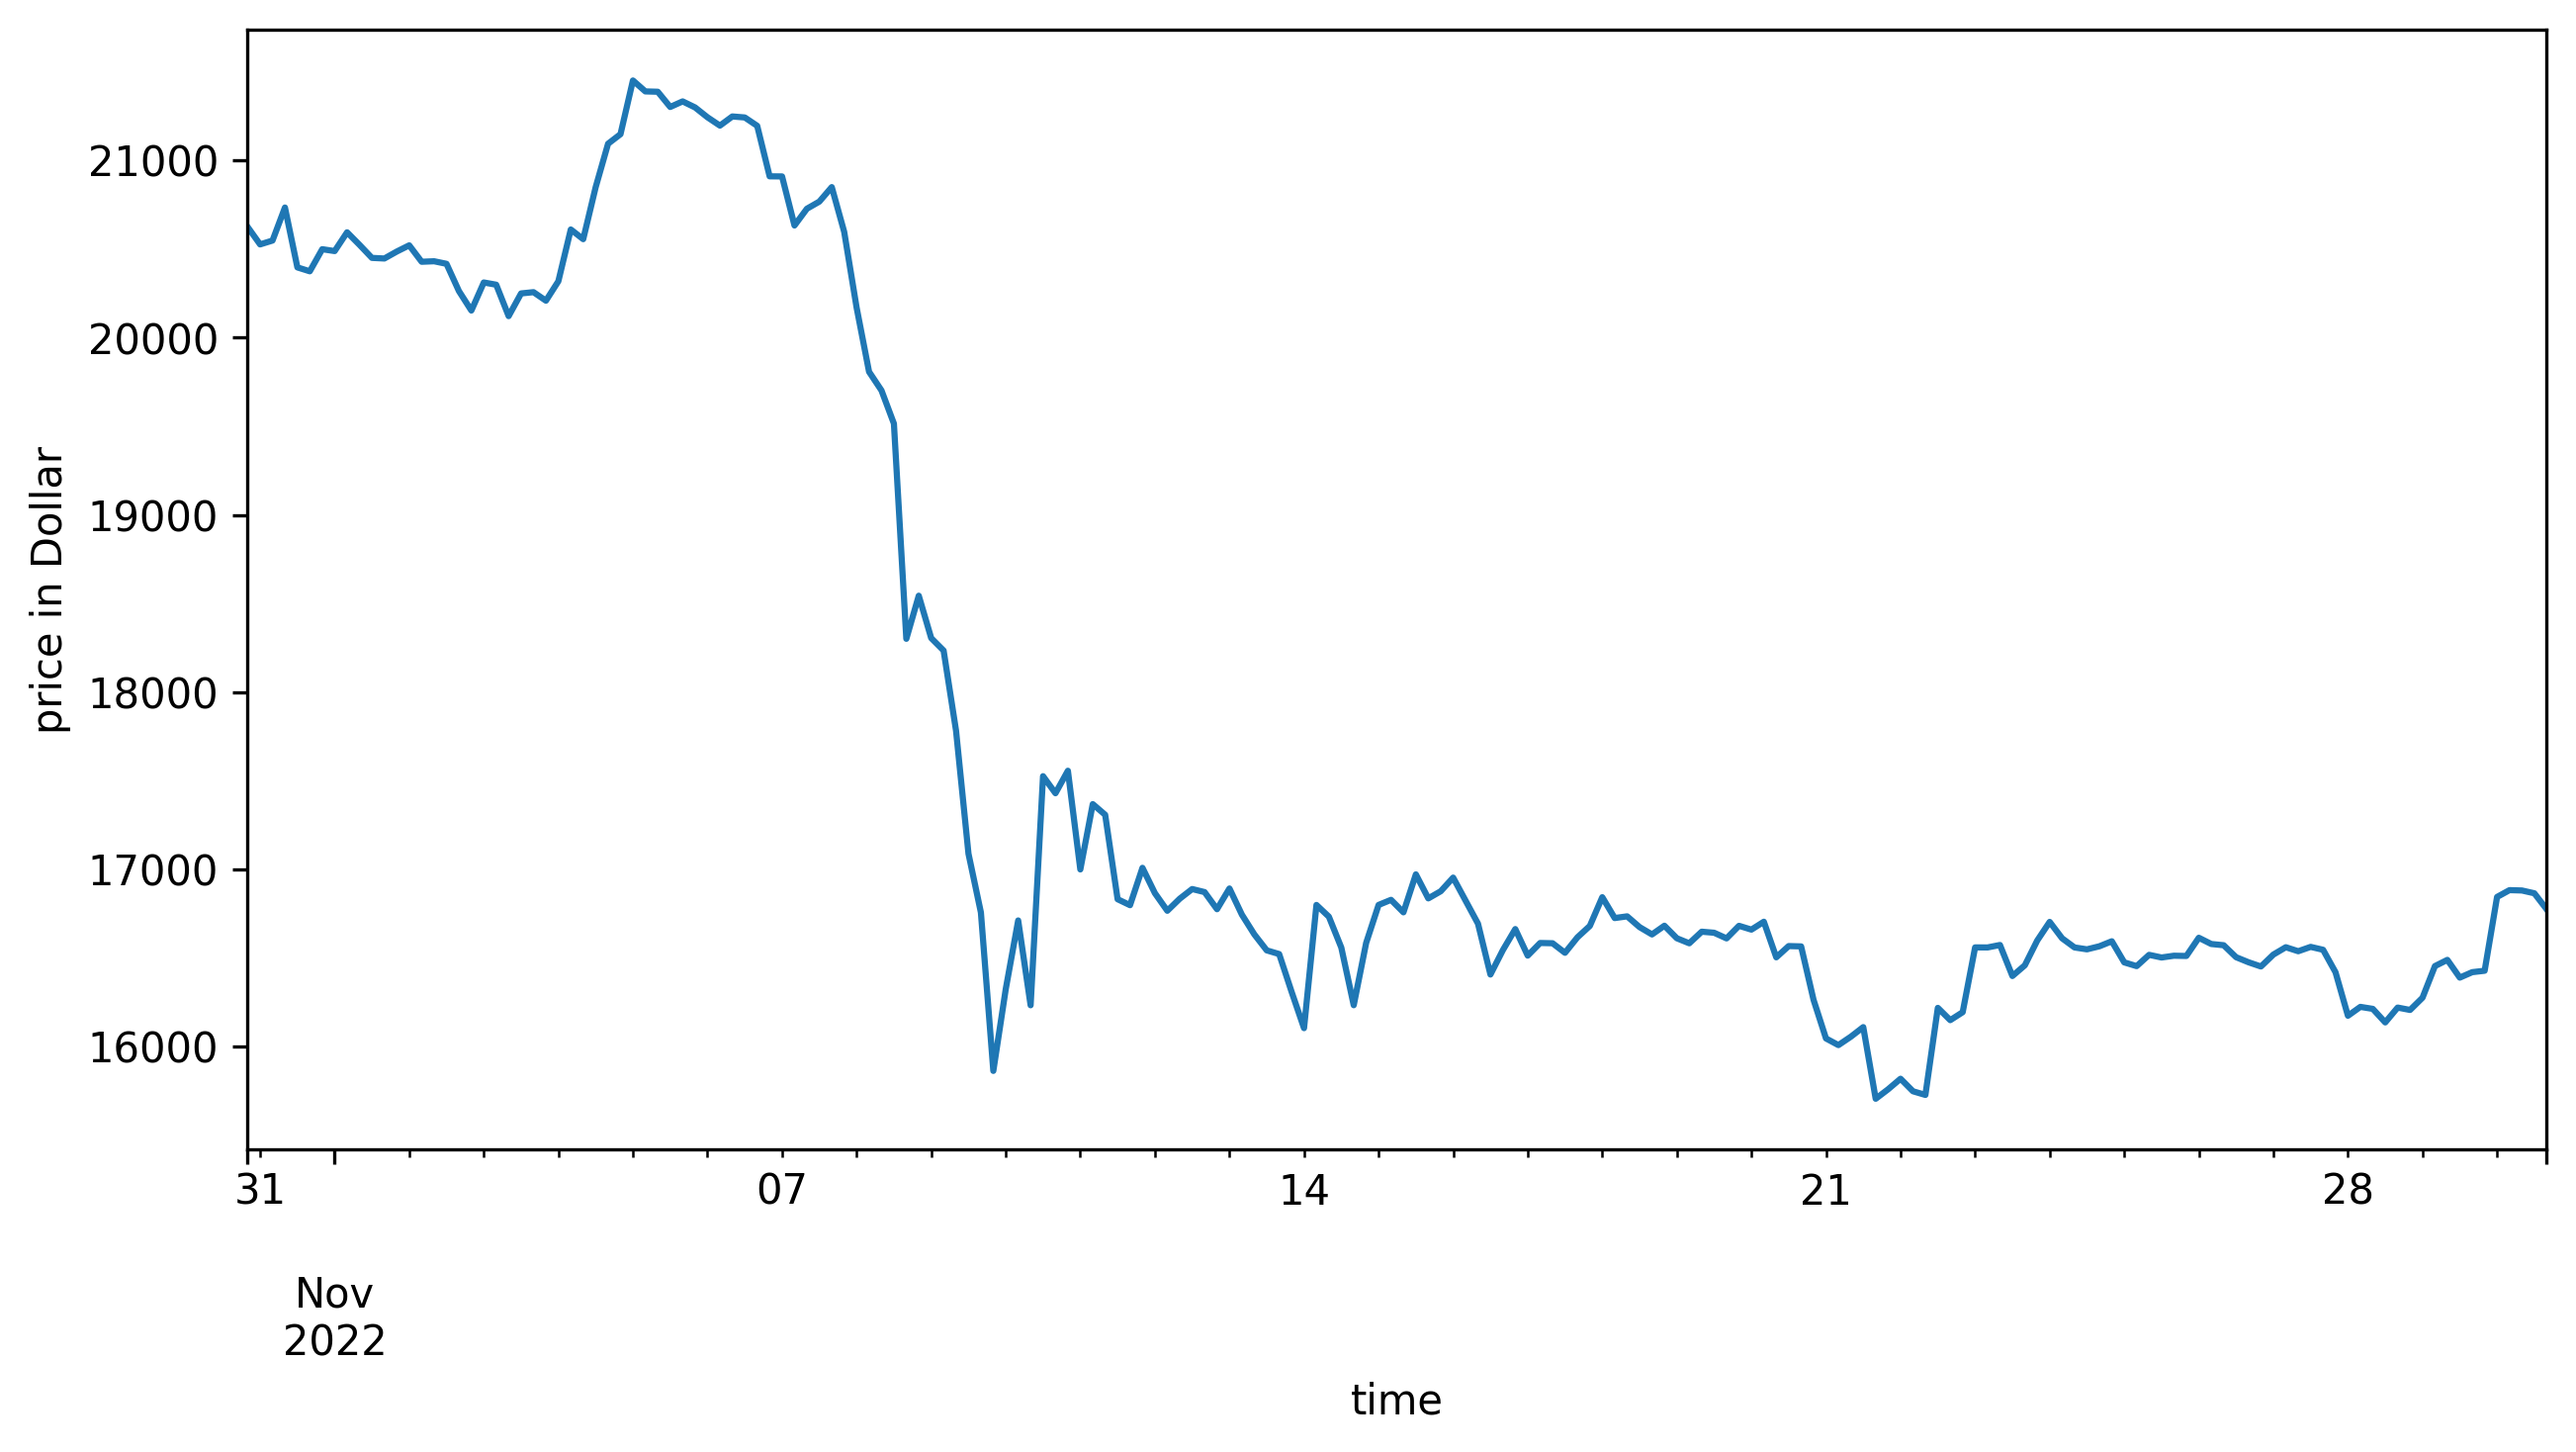

In [4]:
plt.figure(figsize=(10,5), dpi=300)
ax = plt.gca()
df.close.plot(ax=ax)
ax.set_ylabel('price in Dollar')

____
# Test the strategy based on this data

In [9]:
margin = 0.04           # set 4% margin
initial_quote = 200     # how many USD is in your portfolio at the beginning
quotes = initial_quote  # available quote currency
target = 100            # how much value of BTC to hold ($100 worth of BTC)
initial_holdings = 0    # how many BTC is in your portfolio at the beginniing
holdings = initial_holdings
fee = 0.0026            # taker fee without any Tier level
payed_fee = 0

for price in df.close:
    actual_value = holdings * price
    if actual_value < target - target * margin:
        to_buy = target - actual_value
        xfee = to_buy * fee
        quotes -= to_buy + xfee
        holdings += (to_buy - xfee) / price
        payed_fee += xfee
    if actual_value > target + target * margin:
        to_sell = abs(target - actual_value)
        xfee = to_sell * fee
        quotes += to_sell - xfee
        holdings -= to_sell / price
        payed_fee += xfee

profit = (quotes + holdings * df.close.iloc[-1]) - (initial_quote)
pprofit = (1 - (quotes + holdings * df.close.iloc[-1]) / (initial_quote)) * -100

print(f'Available USD: {quotes}                                         \
    \nAvailable BTC: {holdings} ~ {holdings * df.close.iloc[-1]} USD    \
    \nPayed fee: {payed_fee} USD                                        \
    \nProfits: {profit} USD ({round(pprofit,2)}%)                       \
    \nPortfolio net worth: {quotes + holdings * df.close.iloc[-1]} USD ({round(pprofit,2)}%)' 
)

Available USD: 79.75135496579712                                             
Available BTC: 0.005986446684705825 ~ 100.42024855726633 USD        
Payed fee: 0.40826456121877197 USD                                            
Profits: -19.828396476936547 USD (-9.91%)                           
Portfolio net worth: 180.17160352306345 USD (-9.91%)


As you can see, the bot does not make profits here. But maybe if you play with the time scale?